In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("CAR DETAILS.csv")

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [5]:
data.shape

(4340, 8)

In [6]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
data.duplicated().sum()

763

In [8]:
data = data.drop_duplicates()

In [9]:
data.duplicated().sum()

0

In [10]:
def extract_manufacturer(name):
    return name.split()[0]

def extract_model(name):
    return ' '.join(name.split()[1:-1])

def extract_variant(name):
    return name.split()[-1]

In [11]:
data['Manufacturer'] = data['name'].apply(extract_manufacturer)
data['Model'] = data['name'].apply(extract_model)
data['Variant'] = data['name'].apply(extract_variant)

In [12]:
data.drop(columns=['name'], inplace=True)

In [13]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Manufacturer,Model,Variant
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,AC
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI,Minor
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6,SX
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T,Option
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX,i-DTEC


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           3577 non-null   int64 
 1   selling_price  3577 non-null   int64 
 2   km_driven      3577 non-null   int64 
 3   fuel           3577 non-null   object
 4   seller_type    3577 non-null   object
 5   transmission   3577 non-null   object
 6   owner          3577 non-null   object
 7   Manufacturer   3577 non-null   object
 8   Model          3577 non-null   object
 9   Variant        3577 non-null   object
dtypes: int64(3), object(7)
memory usage: 307.4+ KB


In [15]:
data.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [16]:
cat_cols = data.select_dtypes(include='object').columns
print(cat_cols)

Index(['fuel', 'seller_type', 'transmission', 'owner', 'Manufacturer', 'Model',
       'Variant'],
      dtype='object')


In [17]:
num_cols = data.select_dtypes(exclude='object').columns
print(num_cols)

Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [18]:
cat_cols

Index(['fuel', 'seller_type', 'transmission', 'owner', 'Manufacturer', 'Model',
       'Variant'],
      dtype='object')

### Count plot for categorical features

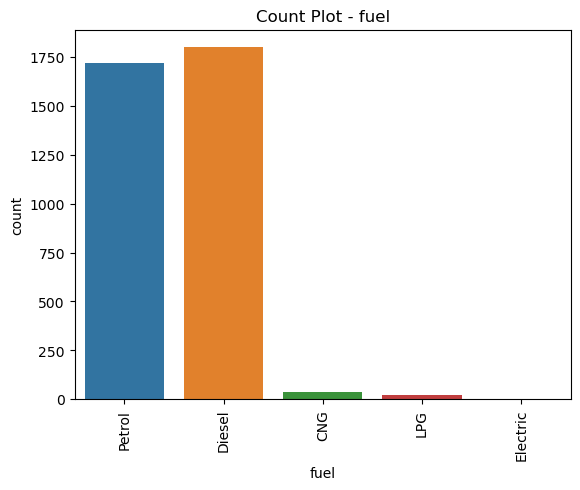

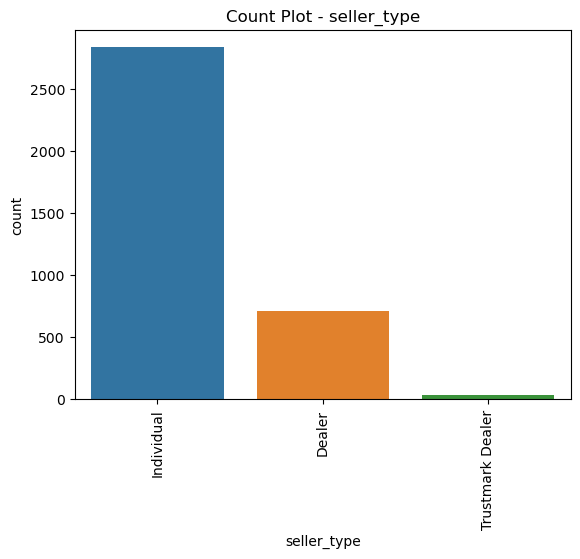

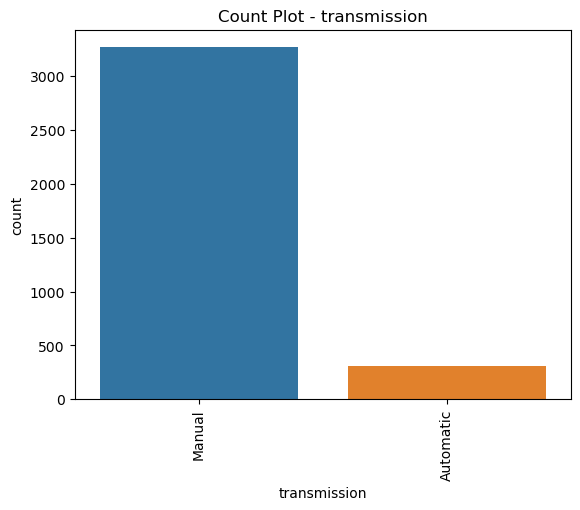

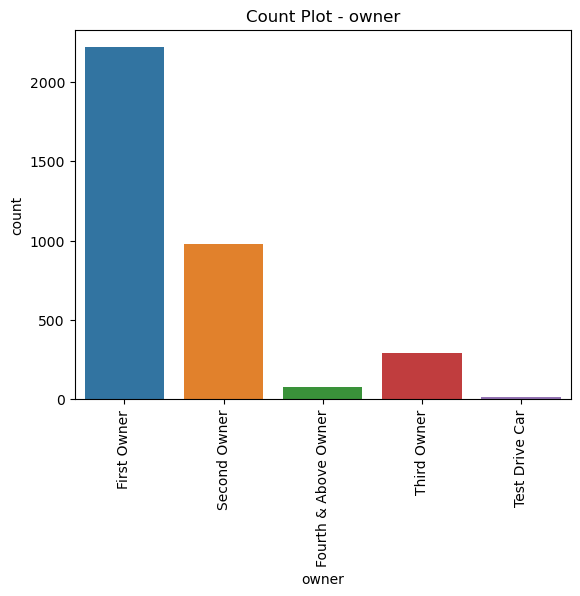

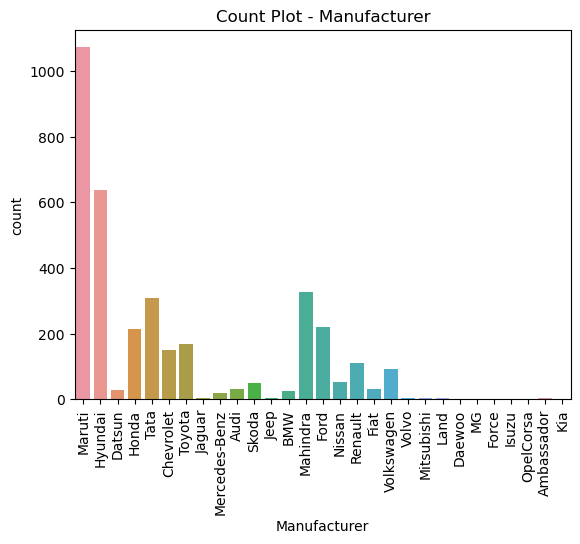

In [19]:
category_col = ['fuel', 'seller_type', 'transmission', 'owner', 'Manufacturer']
for feature in category_col:
    sns.countplot(data=data, x=feature)
    plt.title(f'Count Plot - {feature}')
    plt.xticks(rotation=90)
    plt.show()

### Pairplot to visualize relationships between numerical features

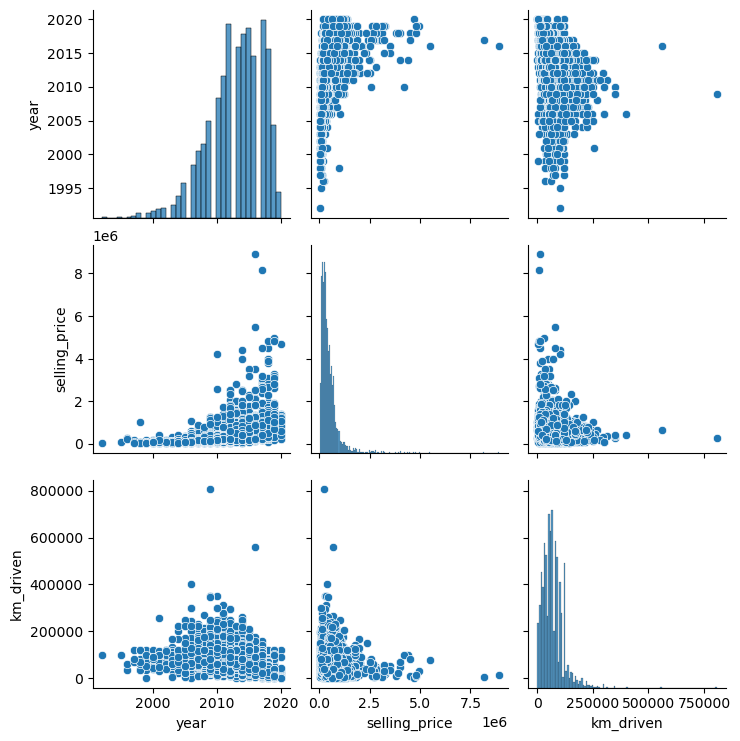

In [20]:
sns.pairplot(data[['year', 'selling_price', 'km_driven']])
plt.show()

### Histogram for 'selling_price' to check its distribution

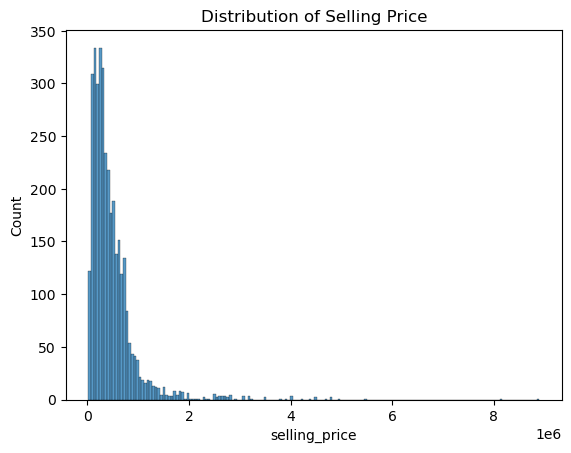

In [21]:
sns.histplot(data['selling_price'])
plt.title('Distribution of Selling Price')
plt.show()

### Box plot for 'year' and 'km_driven' to identify outliers

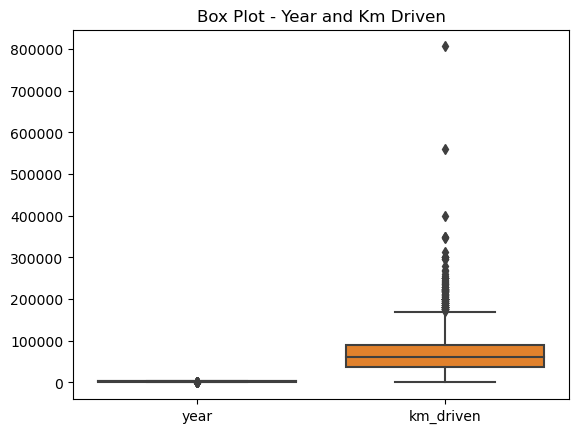

In [22]:
sns.boxplot(data=data[['year', 'km_driven']])
plt.title('Box Plot - Year and Km Driven')
plt.show()

C:\Users\Rupesh\AppData\Local\Temp\ipykernel_20988\2460228711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


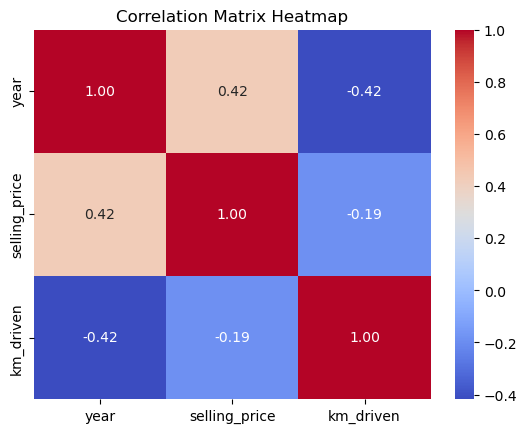

In [23]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()